## Importing libraries

In [ ]:
#!conda install -c conda-forge cartopy
#!pip list

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
import pandas as pd
import glob
import xarray as xr
import warnings
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")


In [3]:
aod_file = glob.glob('./Data/AOD/*')
aod_file

['./Data/AOD\\INSAT3D', './Data/AOD\\INSAT3DR', './Data/AOD\\MODIS']

## READ AOD INSAT 3D PATH


In [4]:
aod_insat3D = glob.glob(aod_file[0]+'/*')
aod_insat3D[:5]

['./Data/AOD\\INSAT3D\\3DIMG_01APR2017_0600_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3D\\3DIMG_01APR2017_0630_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3D\\3DIMG_01APR2017_0700_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3D\\3DIMG_01APR2017_0730_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3D\\3DIMG_01APR2017_0800_L2G_AOD_V01R00.h5']

## Loading AOD INSAT 3DR PATH

In [5]:
aod_insat3DR = glob.glob(aod_file[1]+'/*')
aod_insat3DR[:5]

['./Data/AOD\\INSAT3DR\\3RIMG_01APR2017_0545_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3DR\\3RIMG_01APR2017_0615_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3DR\\3RIMG_01APR2017_0645_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3DR\\3RIMG_01APR2017_0715_L2G_AOD_V01R00.h5',
 './Data/AOD\\INSAT3DR\\3RIMG_01APR2017_0745_L2G_AOD_V01R00.h5']

## Loading Files Using Xarray

In [6]:
ds_3DR = xr.open_mfdataset(aod_insat3DR)
ds_3D = xr.open_mfdataset(aod_insat3D)

## Getting dataset from 2018 to 2019 and region India (8,38) & (68,98) 

In [7]:
ds1_3DR = ds_3DR.sel(time=slice('2018','2019'),latitude=slice(39,8),longitude=slice(67,99))
ds1_3D = ds_3D.sel(time=slice('2018','2019'),latitude=slice(39,8),longitude=slice(67,99))

In [8]:
ds1_3DR.time[:20]

<xarray.DataArray 'time' (time: 20)>
array(['2018-01-01T05:15:00.000000000', '2018-01-01T05:45:00.000000000',
       '2018-01-01T07:45:00.000000000', '2018-01-01T08:15:00.000000000',
       '2018-01-02T05:15:00.000000000', '2018-01-02T05:45:00.000000000',
       '2018-01-02T06:15:00.000000000', '2018-01-02T06:45:00.000000000',
       '2018-01-02T07:15:00.000000000', '2018-01-02T07:45:00.000000000',
       '2018-01-02T08:15:00.000000000', '2018-01-03T05:15:00.000000000',
       '2018-01-03T05:45:00.000000000', '2018-01-03T06:15:00.000000000',
       '2018-01-03T06:45:00.000000000', '2018-01-03T07:15:00.000000000',
       '2018-01-03T07:45:00.000000000', '2018-01-04T05:15:00.000000000',
       '2018-01-04T05:45:00.000000000', '2018-01-04T06:15:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T05:15:00 ... 2018-01-04T06:15:00

In [9]:
ds1_3D.time[:20]

<xarray.DataArray 'time' (time: 20)>
array(['2018-01-01T05:30:00.000000000', '2018-01-01T06:00:00.000000000',
       '2018-01-01T06:30:00.000000000', '2018-01-01T07:00:00.000000000',
       '2018-01-01T07:30:00.000000000', '2018-01-01T08:30:00.000000000',
       '2018-01-02T05:30:00.000000000', '2018-01-02T06:00:00.000000000',
       '2018-01-02T06:30:00.000000000', '2018-01-02T07:00:00.000000000',
       '2018-01-02T07:30:00.000000000', '2018-01-02T08:30:00.000000000',
       '2018-01-03T05:30:00.000000000', '2018-01-03T06:00:00.000000000',
       '2018-01-03T06:30:00.000000000', '2018-01-03T07:00:00.000000000',
       '2018-01-03T07:30:00.000000000', '2018-01-03T08:30:00.000000000',
       '2018-01-04T06:30:00.000000000', '2018-01-04T07:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T05:30:00 ... 2018-01-04T07:30:00

In [25]:
print(f'NaN for 3DR:{ds1_3DR.AOD.load().isnull().sum().data/(2368*310*320)}')
print(f'NaN for 3D:{ds1_3D.AOD.load().isnull().sum().data/(2368*310*320)}')

NaN for 3DR:0.8065113049667612
NaN for 3D:0.5771795308413252


## Merging both 3DR and 3D

In [10]:
ds_merged = xr.concat([ds1_3DR, ds1_3D], dim='time').sortby('time')
ds_merged.time[:20]

<xarray.DataArray 'time' (time: 20)>
array(['2018-01-01T05:15:00.000000000', '2018-01-01T05:30:00.000000000',
       '2018-01-01T05:45:00.000000000', '2018-01-01T06:00:00.000000000',
       '2018-01-01T06:30:00.000000000', '2018-01-01T07:00:00.000000000',
       '2018-01-01T07:30:00.000000000', '2018-01-01T07:45:00.000000000',
       '2018-01-01T08:15:00.000000000', '2018-01-01T08:30:00.000000000',
       '2018-01-02T05:15:00.000000000', '2018-01-02T05:30:00.000000000',
       '2018-01-02T05:45:00.000000000', '2018-01-02T06:00:00.000000000',
       '2018-01-02T06:15:00.000000000', '2018-01-02T06:30:00.000000000',
       '2018-01-02T06:45:00.000000000', '2018-01-02T07:00:00.000000000',
       '2018-01-02T07:15:00.000000000', '2018-01-02T07:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T05:15:00 ... 2018-01-02T07:30:00

## No of  Negative Value 

In [35]:
#No of negative values in dataset
pos = np.sum(ds_merged.AOD.load().data > 0)
neg = np.sum(ds_merged.AOD.load().data <= 0)
NaN = ds_merged.AOD.load().isnull().sum().data
#tot = ds1.AOD.count().values
t,m,n = ds_merged.AOD.load().data.shape
tot = t*m*n
print(f'Total values :{tot} \nNaN:{np.round(NaN/tot,2)*100}% \nPositive :{np.round((pos/tot)*100,2)}% \nNegative :{np.round((neg/tot)*100,2)}% \nMin AOD value:{ds_merged.AOD.min().load().values}')

Total values :443920000 
NaN:73.0% 
Positive :25.38% 
Negative :1.4% 
Min AOD value:-0.05990244820713997


In [36]:
# ds_time = ds1.dropna("time", how="all")
# ds_time

In [37]:
#Converting negative value by NaN values
ds_merged1 = ds_merged.where(ds_merged.AOD > 0)
ds_merged1

<xarray.Dataset>
Dimensions:    (time: 4475, latitude: 310, longitude: 320)
Coordinates:
  * latitude   (latitude) float64 38.95 38.85 38.75 38.65 ... 8.25 8.15 8.05
  * longitude  (longitude) float64 67.05 67.15 67.25 67.35 ... 98.75 98.85 98.95
  * time       (time) datetime64[ns] 2018-01-01T05:15:00 ... 2018-12-31T08:30:00
Data variables:
    AOD        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes: (12/28)
    conventions:                                                    CF-1.6
    title:                                                          3RIMG_11O...
    institute:                                                      BES,SAC/I...
    source:                                                         IMAGER (IMG)
    Unique_Id:                                                      3RIMG_11O...
    Satellite_Name:                                                 INSAT-3DR
    ...                                                             ...
    left_longitude:                                                 45.05
    right_longitude:                                                100.05
    upper_latitude:                                                 45.05
    lower_latitude:                                                 -9.95
    lat_interval:                                                   0.1
    lon_interval:                                                   0.1

### No of negative values in dataset after replacing negative value

In [38]:
pos = np.sum(ds_merged1.AOD.load().data > 0)
neg = np.sum(ds_merged1.AOD.load().data <= 0)
NaN = ds_merged1.AOD.load().isnull().sum().data
t,m,n = ds_merged1.AOD.load().data.shape
tot = t*m*n
print(f'Total values :{tot} \nNaN:{np.round(NaN/tot,2)*100}% \nPositive AOD value:{np.round((pos/tot)*100,2)}% \nNegative AOD value:{np.round((neg/tot)*100,2)}% \nMin AOD value:{ds_merged1.AOD.min().load().values}')

Total values :443920000 
NaN:75.0% 
Positive AOD value:25.38% 
Negative AOD value:0.0% 
Min AOD value:2.8863832213232854e-08


## Analyzing no of data points in a single Day

In [92]:
#For merged Data
time_da = ds_merged1.time.dt.floor("1D")
df = pd.DataFrame(time_da,columns=['Day'])

x = df.Day.unique()
freq = df.Day.value_counts().sort_index()
data = {'Day':x,'Freq':freq}
df2 = pd.DataFrame(data)


(365,)


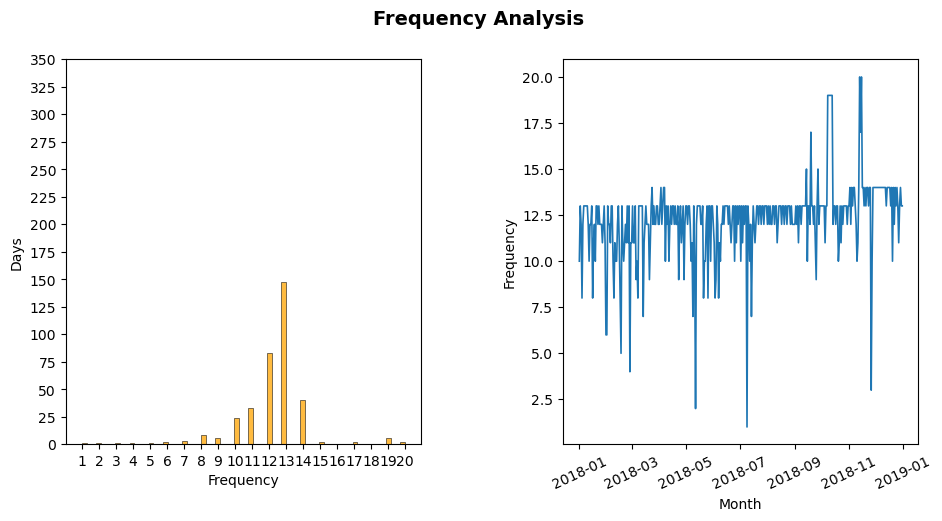

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,5))


#AXIS 1 Histogram
sns.histplot(data=df2, x='Freq',color="orange",ax=ax[0])
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Days')
ax[0].set_xticks(np.arange(1,21,1))
ax[0].set_yticks(np.arange(0,360,25))


#AXIS 2 Line Plot
sns.lineplot(x="Day", y="Freq", data=df2,ax=ax[1],linewidth=1.2)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Frequency')
plt.xticks(rotation=25)

plt.subplots_adjust(wspace=0.4)
fig.suptitle('Frequency Analysis', fontsize=14, fontweight='bold')
plt.show()

## Discard Date which has less than 4 records

In [59]:
# def filter_func(group):
#     if len(group.time) >= 4:
#         return group
#     else:
#         return xr.Dataset()

In [60]:
# ds_daily = ds2.resample(time='1D').count(dim='time')

# Group by day and filter out groups with fewer than 4 data points
# ds_daily_filtered = ds_daily.groupby('time.dayofyear').apply(filter_func)

# df_daily = ds_daily.to_dataframe()

In [61]:
# df_daily.sample(10)

## Count number of records that have NaN value in particular day

In [83]:
test_ds = ds_merged1
test_ds1 = test_ds.resample(time='1D').apply(lambda x: x.isnull().sum())

In [98]:
data = {'Day':test_ds1.time.data,'NaN':test_ds1.AOD.data}
df_merged = pd.DataFrame(data)

(365,)
(365,)


## Scaling using MinMaxScaler

In [115]:
scaler = MinMaxScaler()
df_merged.NaN = scaler.fit_transform(df_merged.NaN.values.reshape(-1,1))
df_merged.head(5)

,Day,NaN
0,2018-01-01,0.349555
1,2018-01-02,0.475610
2,2018-01-03,0.414213
3,2018-01-04,0.258158
4,2018-01-05,0.405109


In [122]:
#Plotting Histogram
df_merged.NaN.describe()

count    365.000000
mean       0.519652
std        0.164499
min        0.000000
25%        0.397831
50%        0.534477
75%        0.638488
max        1.000000
Name: NaN, dtype: float64

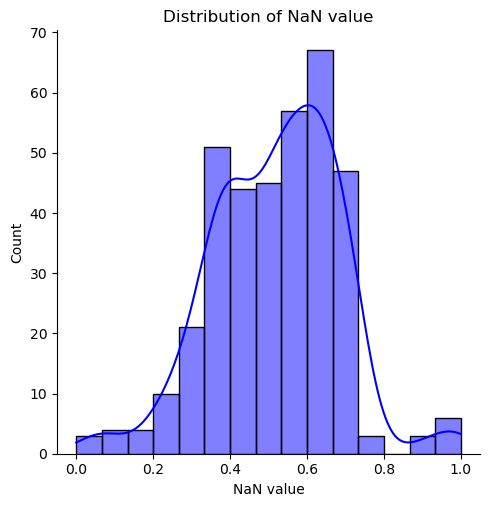

In [131]:
sns.displot(df_merged.NaN, kde=True, color='blue', alpha=0.5)
plt.title('Distribution of NaN value')
plt.xlabel('NaN value')
plt.ylabel('Count')
plt.show()

## Getting Montly Data

In [ ]:
start_date = '2018-01' # starting year from which records are taken.
ds2 = ds1.resample(time = "1M").mean()
ds2['time'] = pd.date_range(start_date,periods=len(ds2.time),freq='MS')
ds2

## Reindexing latitude

In [11]:
ds3 = ds2.reindex(latitude=ds2.latitude[::-1])
ds3

NameError: name 'ds2' is not defined

In [ ]:
#Plotting graph for montly data
fig = plt.figure(figsize=(7,5))
cmap = plt.cm.get_cmap('RdBu')
ds3.AOD.isel(time=0).plot(cmap = cmap)

## Regridding 0.1 X 0.1(AOD) to 0.25 X 0.25(BHL)

In [ ]:
#output resolution
out_res = float(0.25)

#half of orginal resolution
interval_window = out_res/2 
new_lat = np.arange(8-interval_window, 38 + out_res, out_res) # Latitude label i.e 8,..,38
new_lon = np.arange(68-interval_window, 98 + out_res, out_res) # longitude Label i.e 68,..,98


ds4 = ds3.groupby_bins("longitude", bins=new_lon).mean(dim="longitude").groupby_bins("latitude", bins=new_lat).mean(dim="latitude")

#Renaming longitude and latitude coordinate
ds4 = ds4.rename({"longitude_bins":"longitude","latitude_bins":"latitude"})

ds4['latitude'] = new_lat[:-1] + interval_window
ds4['longitude'] = new_lon[:-1] + interval_window

ds4

## plotting graph

In [ ]:
aod_da = ds4.AOD.load()

In [ ]:
fig = plt.figure(figsize=(7,5))
cmap = plt.cm.get_cmap('jet')
projection=ccrs.PlateCarree(central_longitude=0)
ax=plt.axes(projection=projection)
#cmap = plt.cm.get_cmap('RdBu') ##Red/Blue 
#lat and long limits

ds4.AOD.isel(time=0).plot(vmin = aod_da.min(),vmax = aod_da.max(),cmap = cmap.reversed(),ax=ax)
ax.set_extent([68,98,8,38], crs=projection)
ax.coastlines() #adding coastline
#ax.gridlines() #adding gridlines
ax.set_xticks(ds4.longitude[::10])
ax.set_yticks(ds4.latitude[::10])
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', edgecolor='black') ##Adding borders
ax.add_feature(cartopy.feature.STATES, linestyle='-', edgecolor='black') ##adding state borders
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig1 = ds4.AOD.sel(latitude=23.0225,longitude=72.5714,method='nearest').plot(x='time',marker = 'o',color = 'cyan',label='Ahmedabad' )
fig2 = ds4.AOD.sel(latitude=26.84,longitude=80.9462,method='nearest').plot(x='time',marker = 'o',color = 'red',label='lucknow')
plt.xticks(ds4.AOD.time)
plt.legend()
plt.show()